In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
df.isnull().sum() # finding the null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
# country and region is in string form so we converted it into categorical form
from sklearn.preprocessing import LabelEncoder  
LE=LabelEncoder()
df['Country']=LE.fit_transform(df['Country'])
df['Region']=LE.fit_transform(df['Region'])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


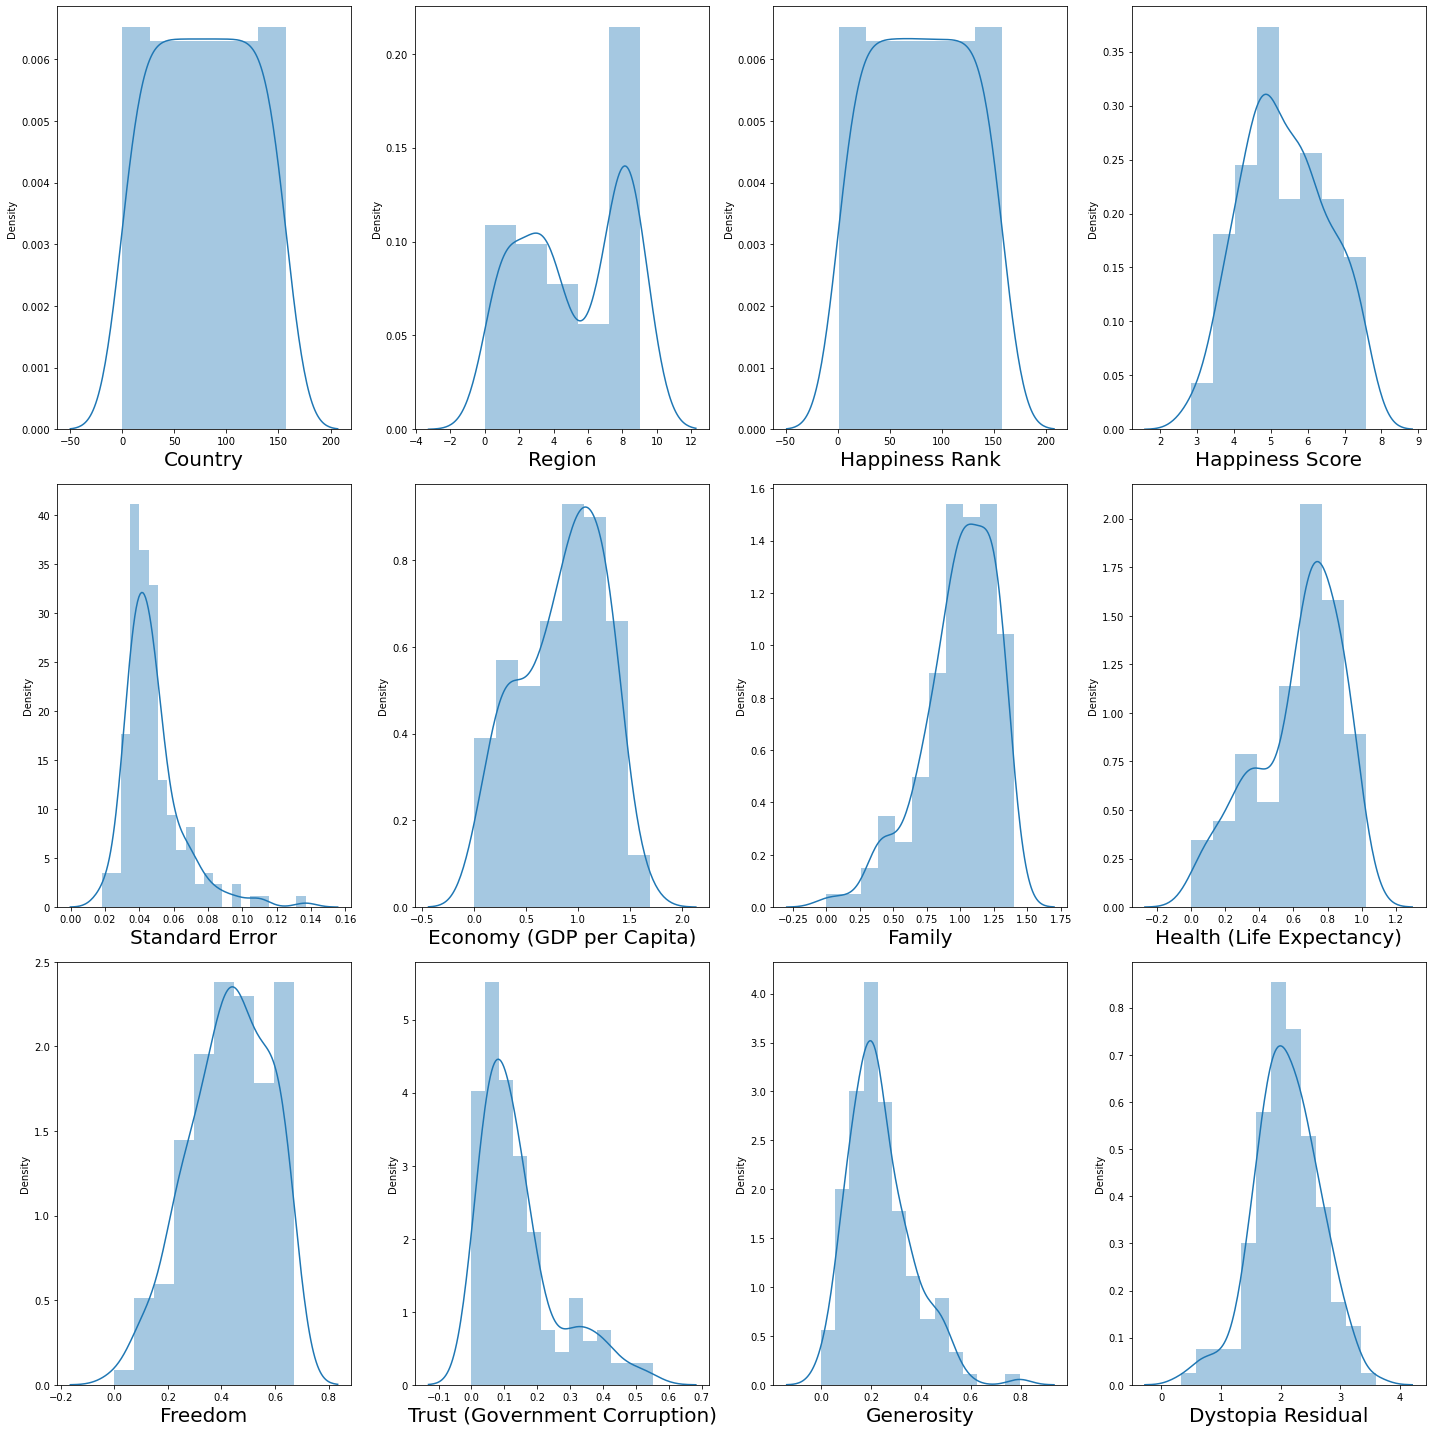

In [6]:
#  let see how data is distributed with every column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [7]:
# divide dataset into target and labels
X=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [8]:
X

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

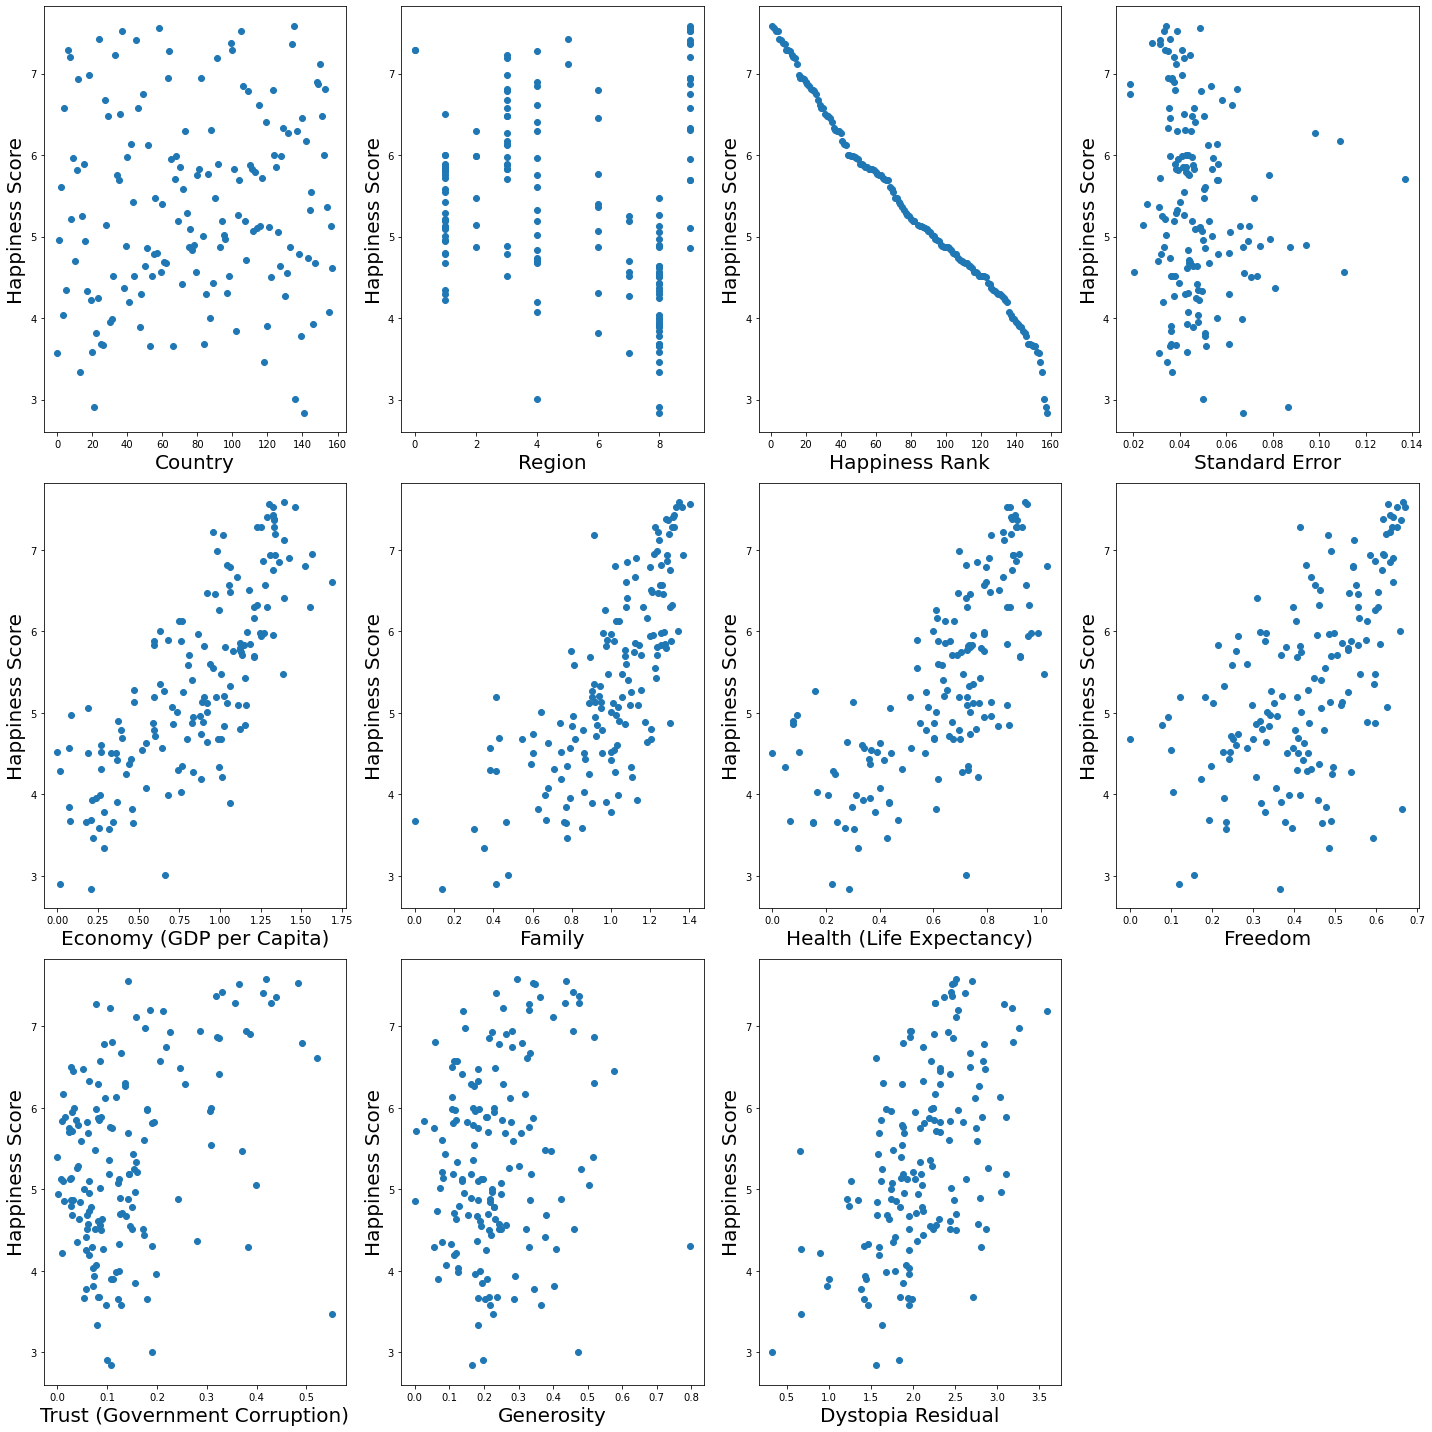

In [10]:
#visualizing relationship
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
# Data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
# spliting data into train and test
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=2000)
y_train.head()

106    4.739
29     6.574
50     5.890
139    3.956
64     5.709
Name: Happiness Score, dtype: float64

In [13]:
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
df.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,141,8,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [15]:
print(lm.predict(scaler.transform([[141,8,158,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726]])))

[2.83882018]


In [16]:
#adjusted R2 score
lm.score(x_train,y_train)

0.9999999455218499

In [17]:
lm.score(x_test,y_test) #check how well the data fit the test data

0.9999999365114562

In [18]:
y_pred=lm.predict(x_test) 
y_pred

array([6.75011199, 6.29484328, 4.69397565, 7.52207574, 3.84488136,
       7.52705525, 6.94025133, 4.03311866, 5.10148667, 4.9489066 ,
       5.88906411, 5.476975  , 4.68071355, 4.36913179, 3.65590792,
       4.78797392, 3.90363835, 5.82407461, 4.95950331, 6.90129247,
       4.67739623, 4.89754553, 4.60953762, 4.63341008, 7.58674822,
       4.2967357 , 5.28645975, 4.21859812, 2.83882018, 3.67777093,
       6.61133256, 4.56462829, 6.93736638, 4.51428661, 5.39879793,
       6.41117303, 5.19242682, 5.97530578, 5.75868104, 4.64219755])

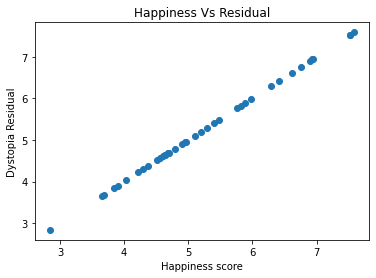

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel('Happiness score')
plt.ylabel('Dystopia Residual')
plt.title('Happiness Vs Residual')
plt.show()

##### Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_pred=lm.predict(x_test)

In [21]:
mean_absolute_error(y_test,y_pred)

0.00025161067128851575

In [22]:
mean_squared_error(y_test,y_pred)

8.709003496693783e-08

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0002951102081713505

In [24]:
#checking the overfitting case with Lasso and Ridge
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
lasscv=LassoCV(alphas=None, normalize=True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [25]:
alpha=lasscv.alpha_
alpha

0.00010312372500631866

In [26]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00010312372500631866)

In [27]:
lasso_reg.score(x_test, y_test)

0.999999202672155

In [28]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
                
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [29]:
ridgecv.alpha_

0.001

In [30]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [31]:
ridge_model.score(x_test,y_test)

0.9999999369021056

#### As our Linear regression score is same as Lasso(L1) and Ridge(L2) with this we conclude that our model is not overfitted it is perect not biased so it is the generalized model